In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from keras.preprocessing import image_dataset_from_directory
from keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, MaxPool2D
import glob
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Mengimpor modul yang diperlukan
import os
import warnings;
warnings.filterwarnings('ignore');

### Load Dataset

In [64]:
data_dir= r'C:\Users\Himawan Putra\Documents\File Pribadi\S2\Semester 2\Deep Learning\UTS'

### Data Prepration And Preprocessing

In [65]:
images_path=glob.glob(data_dir+'/**/*.jpg',recursive=True, root_dir=data_dir)

In [66]:
images_path[:5]

['C:\\Users\\Himawan Putra\\Documents\\File Pribadi\\S2\\Semester 2\\Deep Learning\\UTS\\archive\\fresh_peaches_done\\fresh_peach_1.jpg',
 'C:\\Users\\Himawan Putra\\Documents\\File Pribadi\\S2\\Semester 2\\Deep Learning\\UTS\\archive\\fresh_peaches_done\\fresh_peach_10.jpg',
 'C:\\Users\\Himawan Putra\\Documents\\File Pribadi\\S2\\Semester 2\\Deep Learning\\UTS\\archive\\fresh_peaches_done\\fresh_peach_100.jpg',
 'C:\\Users\\Himawan Putra\\Documents\\File Pribadi\\S2\\Semester 2\\Deep Learning\\UTS\\archive\\fresh_peaches_done\\fresh_peach_101.jpg',
 'C:\\Users\\Himawan Putra\\Documents\\File Pribadi\\S2\\Semester 2\\Deep Learning\\UTS\\archive\\fresh_peaches_done\\fresh_peach_102.jpg']

In [67]:
labels= []
for img in images_path :
    lab= os.path.dirname(img)
    labels.append(lab)

In [68]:
image_labels=[]
for label in labels:
    lab=label.split('/')[-1]
    image_labels.append(lab)

In [69]:
image_labels[:10]

['C:\\Users\\Himawan Putra\\Documents\\File Pribadi\\S2\\Semester 2\\Deep Learning\\UTS\\archive\\fresh_peaches_done',
 'C:\\Users\\Himawan Putra\\Documents\\File Pribadi\\S2\\Semester 2\\Deep Learning\\UTS\\archive\\fresh_peaches_done',
 'C:\\Users\\Himawan Putra\\Documents\\File Pribadi\\S2\\Semester 2\\Deep Learning\\UTS\\archive\\fresh_peaches_done',
 'C:\\Users\\Himawan Putra\\Documents\\File Pribadi\\S2\\Semester 2\\Deep Learning\\UTS\\archive\\fresh_peaches_done',
 'C:\\Users\\Himawan Putra\\Documents\\File Pribadi\\S2\\Semester 2\\Deep Learning\\UTS\\archive\\fresh_peaches_done',
 'C:\\Users\\Himawan Putra\\Documents\\File Pribadi\\S2\\Semester 2\\Deep Learning\\UTS\\archive\\fresh_peaches_done',
 'C:\\Users\\Himawan Putra\\Documents\\File Pribadi\\S2\\Semester 2\\Deep Learning\\UTS\\archive\\fresh_peaches_done',
 'C:\\Users\\Himawan Putra\\Documents\\File Pribadi\\S2\\Semester 2\\Deep Learning\\UTS\\archive\\fresh_peaches_done',
 'C:\\Users\\Himawan Putra\\Documents\\File Prib

In [70]:
preprocessed_images = []


for file in images_path:
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (128,128))
    img = img / 255
    
    preprocessed_images.append(img)

In [71]:
X= np.array(preprocessed_images)

In [72]:
X.shape

(1655, 128, 128, 3)

Found 1655 files belonging to 1 classes.


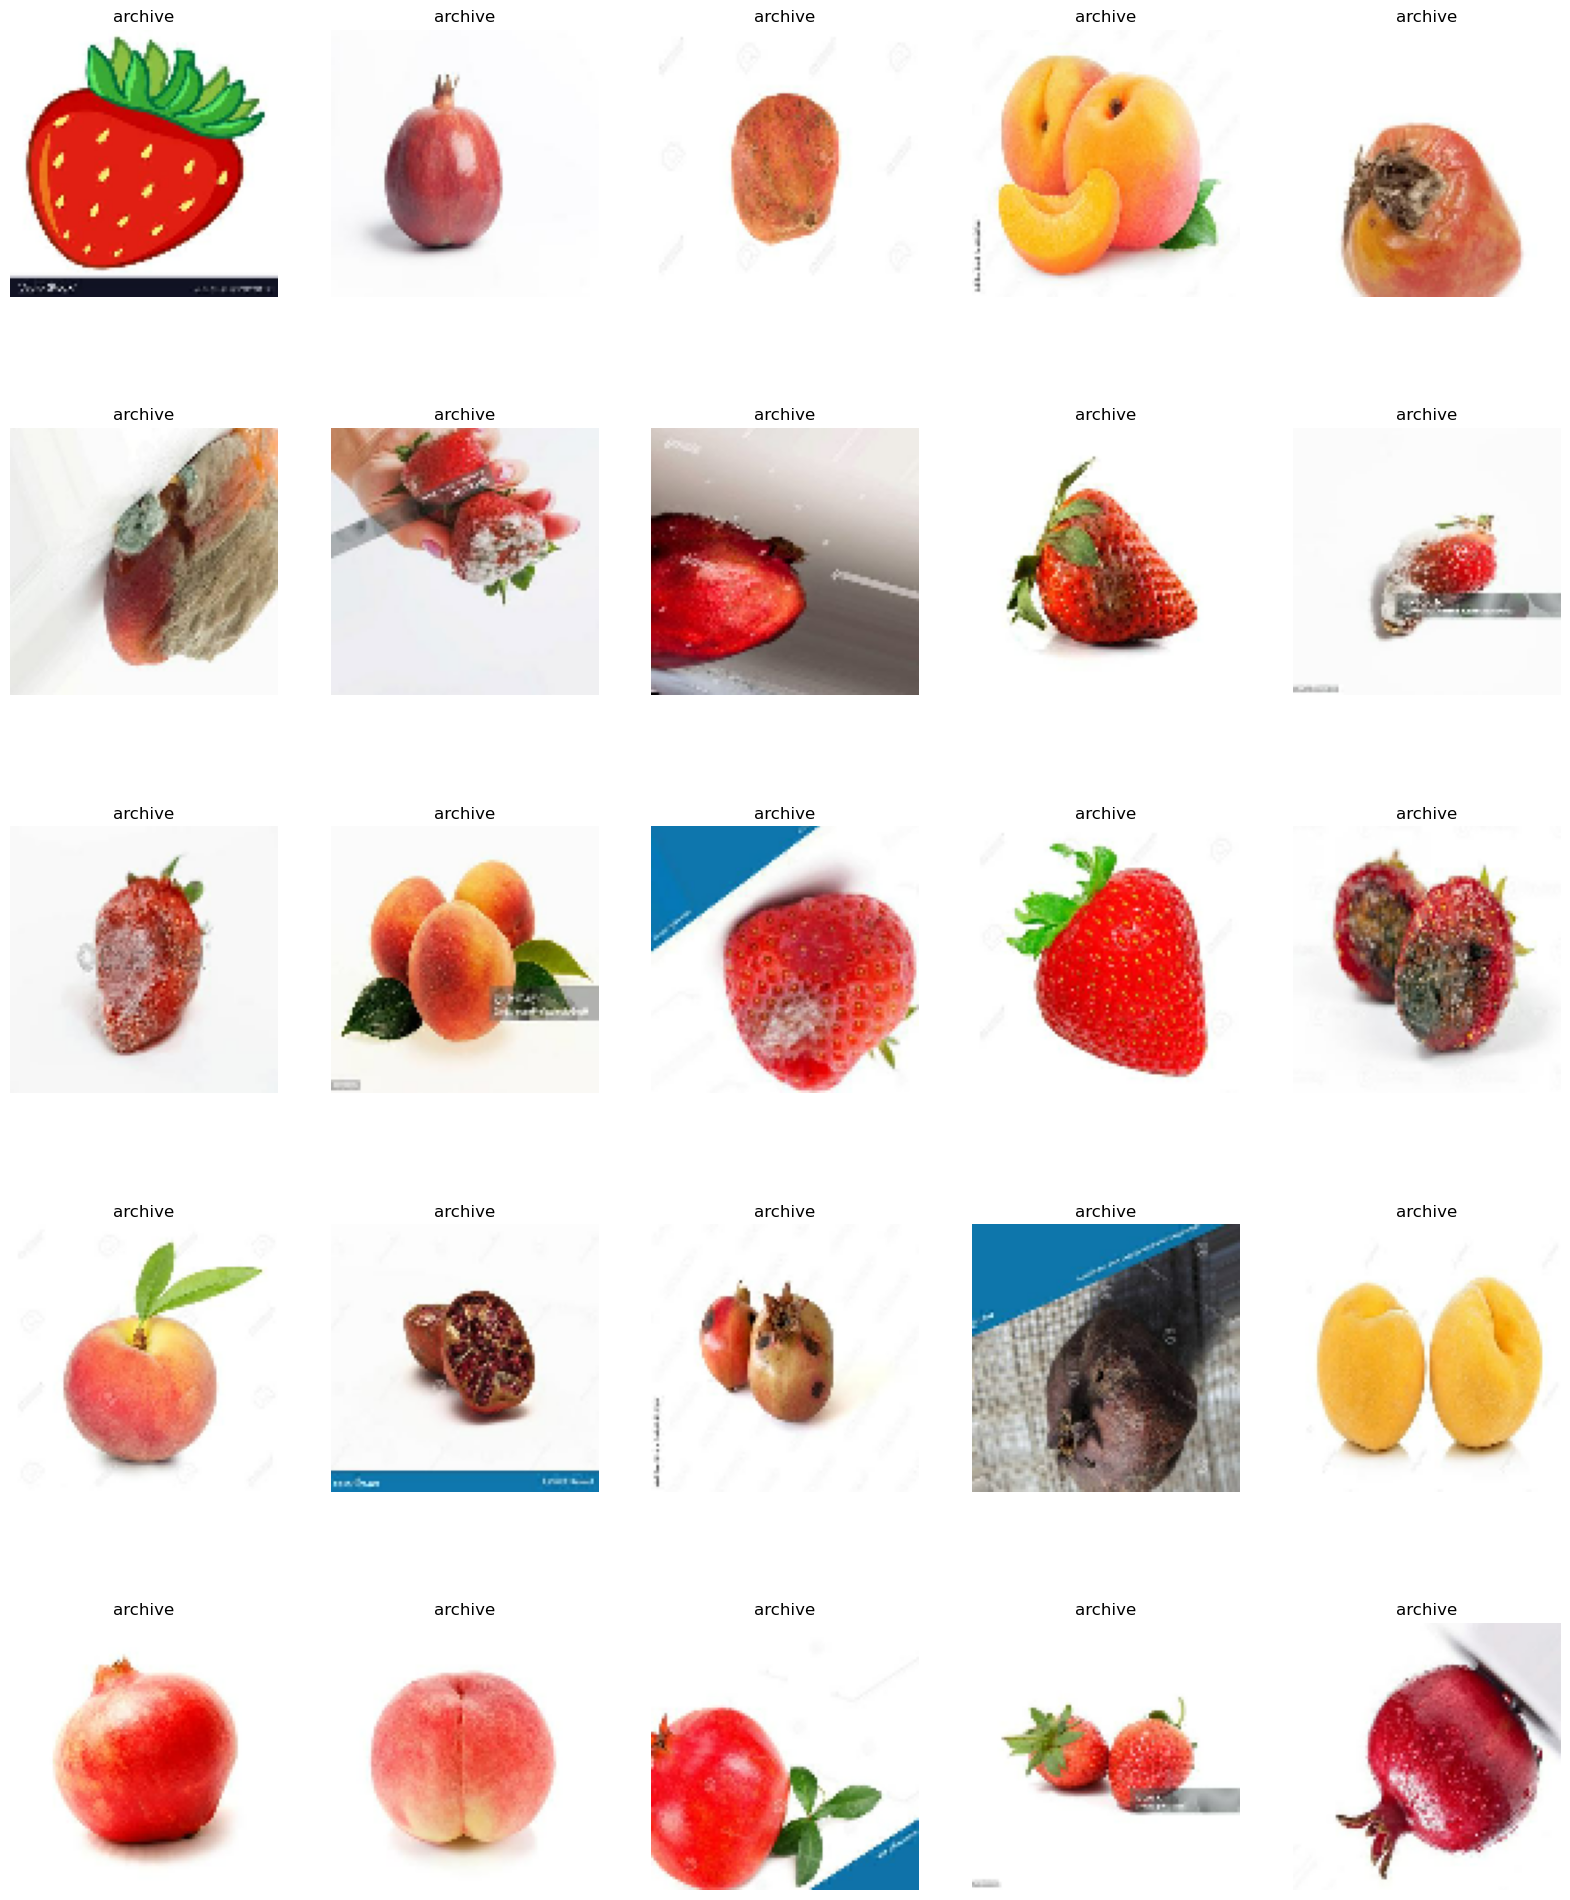

In [73]:
# visualize sample images
attribute = image_dataset_from_directory(data_dir, image_size=(100,100))
plt.figure(figsize=(20,25))
for image, labels in attribute.take(1):
  for i in range (25):
    plt.subplot(5,5, i + 1)
    plt.imshow(np.array(image[i]).astype("uint8"))
    plt.title(attribute.class_names[labels[i]])
    plt.axis("off")

In [74]:
y = np.array(image_labels)

In [75]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

### Splittin Data

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## Modelling

### Model MobileNetV2 tanpa transfer learning

In [78]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, DepthwiseConv2D, BatchNormalization, ReLU, Add, GlobalAveragePooling2D, Dense
from tensorflow.keras import backend


def MobileNetV2(input_shape=(128, 128, 3), num_classes=1000, alpha=1.0):
    input = Input(shape=input_shape)

    # Initial Convolution
    x = Conv2D(int(32 * alpha), (3, 3), strides=(2, 2), padding='same')(input)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Inverted Residual Blocks
    x = inverted_residual_block(x, filters=16, alpha=alpha, stride=1, expansion=1)
    x = inverted_residual_block(x, filters=24, alpha=alpha, stride=2, expansion=6)
    x = inverted_residual_block(x, filters=24, alpha=alpha, stride=1, expansion=6)
    x = inverted_residual_block(x, filters=32, alpha=alpha, stride=2, expansion=6)
    x = inverted_residual_block(x, filters=32, alpha=alpha, stride=1, expansion=6)
    x = inverted_residual_block(x, filters=32, alpha=alpha, stride=1, expansion=6)
    x = inverted_residual_block(x, filters=64, alpha=alpha, stride=2, expansion=6)
    x = inverted_residual_block(x, filters=64, alpha=alpha, stride=1, expansion=6)
    x = inverted_residual_block(x, filters=64, alpha=alpha, stride=1, expansion=6)
    x = inverted_residual_block(x, filters=96, alpha=alpha, stride=1, expansion=6)
    x = inverted_residual_block(x, filters=96, alpha=alpha, stride=1, expansion=6)
    x = inverted_residual_block(x, filters=96, alpha=alpha, stride=1, expansion=6)
    x = inverted_residual_block(x, filters=160, alpha=alpha, stride=2, expansion=6)
    x = inverted_residual_block(x, filters=160, alpha=alpha, stride=1, expansion=6)
    x = inverted_residual_block(x, filters=160, alpha=alpha, stride=1, expansion=6)
    x = inverted_residual_block(x, filters=320, alpha=alpha, stride=1, expansion=6)

    # Final Convolution
    x = Conv2D(int(1280 * alpha), (1, 1), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Global Average Pooling and Dense Layer
    x = GlobalAveragePooling2D()(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=input, outputs=x)
    return model

def inverted_residual_block(input, filters, alpha, stride, expansion):
    channel_axis = 1 if backend.image_data_format() == 'channels_first' else -1
    in_channels = backend.int_shape(input)[channel_axis]
    pointwise_conv_filters = int(filters * alpha)

    # Expansion Phase
    x = Conv2D(expansion * in_channels, (1, 1), padding='same', strides=(1, 1), activation=None)(input)
    x = BatchNormalization(axis=channel_axis)(x)
    x = ReLU()(x)

    # Depthwise Convolution
    x = DepthwiseConv2D((3, 3), strides=(stride, stride), depth_multiplier=1, padding='same', activation=None)(x)
    x = BatchNormalization(axis=channel_axis)(x)
    x = ReLU()(x)

    # Linear Bottleneck
    x = Conv2D(pointwise_conv_filters, (1, 1), padding='same', strides=(1, 1), activation=None)(x)
    x = BatchNormalization(axis=channel_axis)(x)

    if in_channels == pointwise_conv_filters and stride == 1:
        return Add()([input, x])
    return x

# Create MobileNetV2 model
transfer_learning_model = MobileNetV2()

# Display model summary
transfer_learning_model.summary()


Model: "functional_473"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10      │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_81 (Conv2D)  │ (None, 64, 64,    │        896 │ input_layer_10[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        128 │ conv2d_81[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_153 (ReLU)    │ (None, 64, 64,    │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_82 (Conv2D)  │ (None, 64, 64,    │      1,056 │ re_lu_153[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        128 │ conv2d_82[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_154 (ReLU)    │ (None, 64, 64,    │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ depthwise_conv2d_72 │ (None, 64, 64,    │        320 │ re_lu_154[0][0]   │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        128 │ depthwise_conv2d… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_155 (ReLU)    │ (None, 64, 64,    │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_83 (Conv2D)  │ (None, 64, 64,    │        528 │ re_lu_155[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │         64 │ conv2d_83[0][0]   │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_84 (Conv2D)  │ (None, 64, 64,    │      1,632 │ batch_normalizat… │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        384 │ conv2d_84[0][0]   │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_156 (ReLU)    │ (None, 64, 64,    │          0 │ batch_normalizat… │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ depthwise_conv2d_73 │ (None, 32, 32,    │        960 │ re_lu_156[0][0]   │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        384 │ depthwise_conv2d

 Total params: 3,500,456 (13.35 MB)

 Trainable params: 3,467,944 (13.23 MB)

 Non-trainable params: 32,512 (127.00 KB)

In [81]:
# Compile the model
transfer_learning_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = transfer_learning_model.fit(X_train, y_train, epochs=50, batch_size=100, validation_data=(X_val, y_val))

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 123s 6s/step - accuracy: 0.2278 - loss: 4.3389 - val_accuracy: 0.1623 - val_loss: 6.3239
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 60s 6s/step - accuracy: 0.4526 - loss: 1.3626 - val_accuracy: 0.1623 - val_loss: 5.0323
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 52s 5s/step - accuracy: 0.5318 - loss: 1.1729 - val_accuracy: 0.1623 - val_loss: 3.7036
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 49s 4s/step - accuracy: 0.6407 - loss: 0.9339 - val_accuracy: 0.1623 - val_loss: 2.8188
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.7531 - loss: 0.6394 - val_accuracy: 0.1623 - val_loss: 2.5802
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 56s 5s/step - accuracy: 0.8272 - loss: 0.4628 - val_accuracy: 0.1623 - val_loss: 2.8598
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 54s 5s/step - accuracy: 0.8486 - loss: 0.4358 - val_accuracy: 0.1623 - val_loss: 3.2126
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 55s 5s/step - accuracy: 0.8103 - loss: 0.4784 - val_accuracy: 0.1623 - val_loss

In [82]:
# Ambil loss dari history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

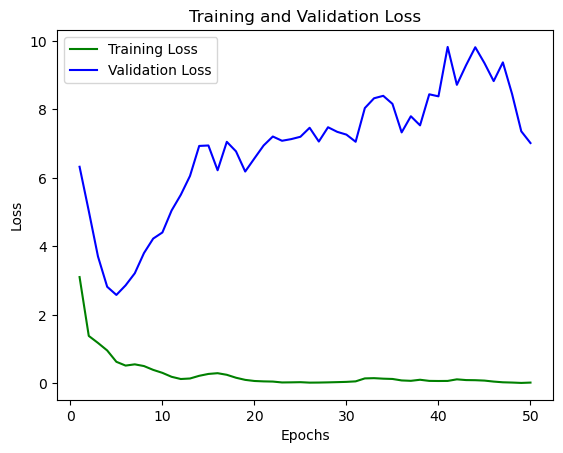

In [83]:
# Plot kurva loss
plt.plot(epochs, train_loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [84]:
# Mengevaluasi kinerja model menggunakan data validasi
val_loss, val_acc = transfer_learning_model.evaluate(X_val, y_val)
print("Model Validation Accuracy:", val_acc)

9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 334ms/step - accuracy: 0.1677 - loss: 6.8745
Model Validation Accuracy: 0.1622641533613205


### Evaluating the Model

In [85]:
# Evaluate the model on the test set
test_loss, test_accuracy = transfer_learning_model.evaluate(X_test,y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 250ms/step - accuracy: 0.1494 - loss: 6.9870
Test loss: 6.930437088012695
Test accuracy: 0.15407854318618774


### Transfer Learning without Fine Tuning

In [86]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

def create_transfer_learning_model(input_shape, num_classes):
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze the base model
    base_model.trainable = False

    # Add custom layers on top
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    # This is the model we will train
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# 6 classes for the fruits
transfer_learning_model = create_transfer_learning_model((128, 128, 3), 6)
transfer_learning_model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_475"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11      │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 64, 64,    │        864 │ input_layer_11[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 64, 64,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 64, 64,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 64, 64,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 64, 64,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 64, 64,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 65, 65,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 32, 32,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 32, 32,    │      2,304 │ block_1_depthwis

 Total params: 3,575,878 (13.64 MB)

 Trainable params: 1,317,894 (5.03 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [87]:
# Compile the model
transfer_learning_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = transfer_learning_model.fit(X_train, y_train, epochs=50, batch_size=100, validation_data=(X_val, y_val))

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.5083 - loss: 1.3787 - val_accuracy: 0.8679 - val_loss: 0.4192
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.9090 - loss: 0.2710 - val_accuracy: 0.9094 - val_loss: 0.3181
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9682 - loss: 0.1103 - val_accuracy: 0.9094 - val_loss: 0.2772
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.9839 - loss: 0.0673 - val_accuracy: 0.9245 - val_loss: 0.2511
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9916 - loss: 0.0413 - val_accuracy: 0.9283 - val_loss: 0.2248
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.9975 - loss: 0.0259 - val_accuracy: 0.9245 - val_loss: 0.2184
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 1.0000 - loss: 0.0208 - val_accuracy: 0.9245 - val_loss: 0.2280
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 1.0000 - loss: 0.0115 - val_accuracy: 0.9321 - val_loss:

In [88]:
# Ambil loss dari history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

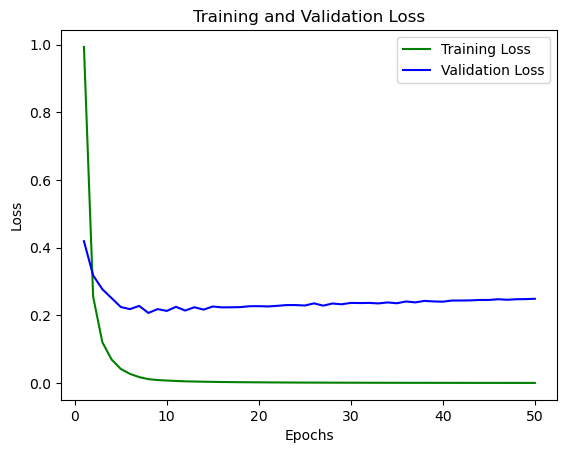

In [89]:
# Plot kurva loss
plt.plot(epochs, train_loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [90]:
# Mengevaluasi kinerja model menggunakan data validasi
val_loss, val_acc = transfer_learning_model.evaluate(X_val, y_val)
print("Model Validation Accuracy:", val_acc)

9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 271ms/step - accuracy: 0.9370 - loss: 0.2218
Model Validation Accuracy: 0.9283018708229065


### Evaluating the Model

In [91]:
# Evaluate the model on the test set
test_loss, test_accuracy = transfer_learning_model.evaluate(X_test,y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 351ms/step - accuracy: 0.9151 - loss: 0.2912
Test loss: 0.302467405796051
Test accuracy: 0.9123867154121399


### Transfer Learning with Fine Tuning

In [92]:
# Define the base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Unlock some layers for fine-tuning
base_model.trainable = True

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all layers before the fine-tune layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(6, activation='softmax')(x)

# This is the model we will train
transfer_learning_model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
transfer_learning_model.compile(optimizer='adam',
                                loss='sparse_categorical_crossentropy',
                                metrics=['accuracy'])

In [93]:
# Compile the model
transfer_learning_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = transfer_learning_model.fit(X_train, y_train, epochs=50, batch_size=100, validation_data=(X_val, y_val))

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.5827 - loss: 1.0763 - val_accuracy: 0.4868 - val_loss: 1.9833
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.9322 - loss: 0.2475 - val_accuracy: 0.4679 - val_loss: 3.7289
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9524 - loss: 0.1532 - val_accuracy: 0.5811 - val_loss: 2.7507
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9638 - loss: 0.1295 - val_accuracy: 0.3057 - val_loss: 13.7991
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9849 - loss: 0.0440 - val_accuracy: 0.2453 - val_loss: 17.2042
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.9841 - loss: 0.0456 - val_accuracy: 0.2113 - val_loss: 16.8426
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9938 - loss: 0.0222 - val_accuracy: 0.3925 - val_loss: 10.4143
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.9901 - loss: 0.0292 - val_accuracy: 0.4906 - val_l

In [94]:
# Ambil loss dari history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

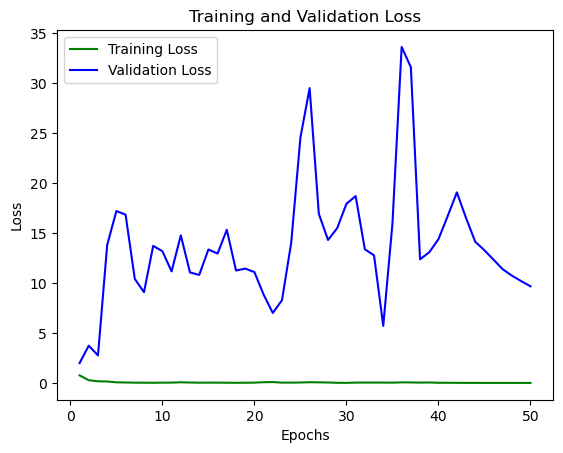

In [95]:
# Plot kurva loss
plt.plot(epochs, train_loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [96]:
# Mengevaluasi kinerja model menggunakan data validasi
val_loss, val_acc = transfer_learning_model.evaluate(X_val, y_val)
print("Model Validation Accuracy:", val_acc)

9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 296ms/step - accuracy: 0.6319 - loss: 8.3392
Model Validation Accuracy: 0.5962263941764832


### Evaluating the Model

In [97]:
# Evaluate the model on the test set
test_loss, test_accuracy = transfer_learning_model.evaluate(X_test,y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 222ms/step - accuracy: 0.6110 - loss: 9.4680
Test loss: 9.567970275878906
Test accuracy: 0.6283987760543823
